In [132]:
vectype = "BoW"
size = 20
dataFile = "training.1600000.processed.noemoticon.csv"
makingCSV = False

In [133]:
import sklearn.model_selection
import sklearn.naive_bayes
import sklearn.linear_model
import sklearn.svm
import sklearn.metrics
import pandas as pd

In [134]:
if not makingCSV:
    from CleanTweetsScript import vectorize, clean
    df = vectorize(clean(dataFile, size))

    print("return")
    print(df.shape)

else:
    vectorize(clean(dataFile= size), makeCSV= True)
    df = pd.read_csv("cleaned_data.csv", index_col=0)
    print("csv")


df = df[df.Label != 2]
df = df[pd.notna(df.Label)]

return
(40, 479)


In [135]:
# 3:int((df.shape[1] - 3) / 2)

bow_df = df.iloc[:, 3:int((df.shape[1] - 3) / 2 + 3)]
bow_df = bow_df.reset_index(drop=True)

tfidf_df = df.iloc[:, int((df.shape[1] - 3) / 2 + 3):df.shape[1]]
tfidf_df = tfidf_df.reset_index(drop=True)

sentiment = df.Label.reset_index(drop=True)

In [136]:
print(df.head())
print()
print(len(df))
print(df.shape[1])
print("\n\n")
print("bow_df")
print(bow_df.shape)
print(bow_df.head())
print(bow_df.tail())


print("tfidf_df")
print(tfidf_df.shape)
print(tfidf_df.head())
print(tfidf_df.tail())

   Label                                               Text  \
0     -1  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1     -1  is upset that he can't update his Facebook by ...   
2     -1  @Kenichan I dived many times for the ball. Man...   
3     -1    my whole body feels itchy and like its on fire    
4     -1  @nationwideclass no, it's not behaving at all....   

                                             Cleaned  B: awww  B: bummer  \
0     awww bummer shoulda got david carr third day d        0          0   
1  upset updat facebook text might cri result sch...        0          0   
2    dive mani time ball manag save 50 rest go bound        0          0   
3                    whole bodi feel itchi like fire        0          0   
4                                      behav mad see        0          0   

   B: shoulda  B: got  B: david  B: carr  B: third  ...  T: dinner  T: danc  \
0           0       0         0        0         0  ...        0.0      0.0   
1     

Started at 01:04:38
Split at 01:04:38
Naive Bayes fit at 01:04:38
Logistic Regression fit at 01:04:38
Support Vector Machine fit at 01:04:38


,Accuracy,Precision,Recall,F1
Naive Bayes,0.333333,0.40,0.285714,0.333333
Logistic Regression,0.416667,0.50,0.142857,0.222222
Support Vector Machine,0.583333,0.75,0.428571,0.545455


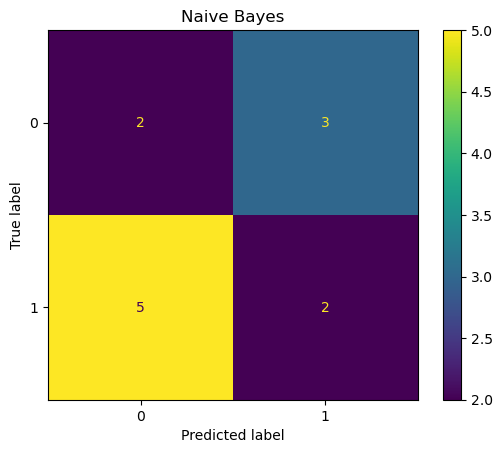

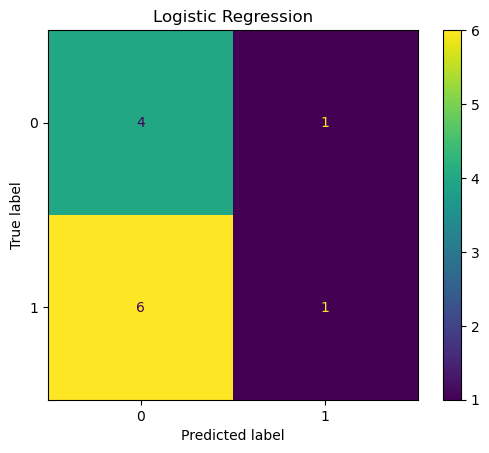

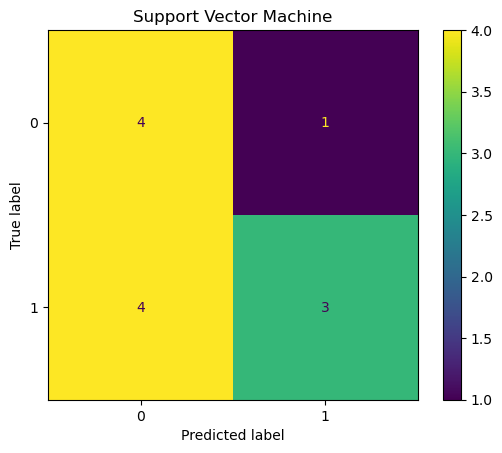

In [137]:
#x_train = x_test = y_train = y_test = nb = nb_pred = lr = lr_pred = svm = svm_pred = timeLog = None 
#timeLogList = []

def fit(rep, refit= True, save= True, plot= True):
    #global x_train, x_test, y_train, y_test, nb, nb_pred, lr, lr_pred, svm, svm_pred, timeLog, timeLogList

    if refit == True:
        from datetime import datetime
        timeLogList = []
        print("Started at " + datetime.now().strftime("%H:%M:%S"))
        timeLogList.append("Started at " + datetime.now().strftime("%H:%M:%S"))

        if rep in ["BoW", "TFIDF"]:
            x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(bow_df if rep == "BoW" else tfidf_df, \
                                                                                        sentiment, train_size=0.7)
            print("Split at " + datetime.now().strftime("%H:%M:%S"))
            timeLogList.append("Split at " + datetime.now().strftime("%H:%M:%S"))

            nb = sklearn.naive_bayes.MultinomialNB()
            nb.fit(x_train, y_train)
            nb_pred = nb.predict(x_test)
            print("Naive Bayes fit at " + datetime.now().strftime("%H:%M:%S"))
            timeLogList.append("Naive Bayes fit at " + datetime.now().strftime("%H:%M:%S"))

            lr = sklearn.linear_model.LogisticRegression()
            lr.fit(x_train, y_train)
            lr_pred = lr.predict(x_test)
            print("Logistic Regression fit at " + datetime.now().strftime("%H:%M:%S"))
            timeLogList.append("Logistic Regression fit at " + datetime.now().strftime("%H:%M:%S"))

            svm = sklearn.svm.SVC()
            svm.fit(x_train, y_train)
            svm_pred = svm.predict(x_test)
            print("Support Vector Machine fit at " + datetime.now().strftime("%H:%M:%S"))
            timeLogList.append("Support Vector Machine fit at " + datetime.now().strftime("%H:%M:%S"))
            timeLog = "\n".join(timeLogList)
        else:
            raise Exception("Variable \'model\' must be \'BoW\' or \'TFIDF\'.")
        
    def metrics(y_true, y_pred):
        accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
        precision = sklearn.metrics.precision_score(y_true, y_pred)
        recall = sklearn.metrics.recall_score(y_true, y_pred)
        f1 = sklearn.metrics.f1_score(y_true, y_pred)
        return accuracy, precision, recall, f1

    nb_conf_matrix = sklearn.metrics.confusion_matrix(y_test, nb_pred, labels=nb.classes_)
    nb_d = metrics(y_test, nb_pred)

    lr_conf_matrix = sklearn.metrics.confusion_matrix(y_test, lr_pred, labels=nb.classes_)
    lr_d = metrics(y_test, lr_pred)

    svm_conf_matrix = sklearn.metrics.confusion_matrix(y_test, svm_pred, labels=nb.classes_)
    svm_d = metrics(y_test, svm_pred)


    metrics_df = pd.DataFrame([nb_d, lr_d, svm_d], columns= ["Accuracy", "Precision", "Recall", "F1"], \
                            index= ["Naive Bayes", "Logistic Regression", "Support Vector Machine"])
    
    if save == True:
        from joblib import dump, load
        import os

        try:
            os.mkdir('models')
        except FileExistsError:
            pass

        def saveModel(model, name, size):
            try:
                os.mkdir(rf'models\{vectype}{size}')
            except FileExistsError:
                pass
            #cd = os.path.dirname(__file__)
            cd = rf"C:\Users\marce\Project\models\{rep}{size}"
            newPath = os.path.join(cd, rf'Model_{rep}_{name}_{size}.pkl')
            dump(model, newPath)
            statsPath = os.path.join(cd, rf'Metrics_{rep}_{size}.html')
            metrics_df.to_html(statsPath)
            logPath = os.path.join(cd, rf'TimeLog_{rep}_{size}.txt')
            with open(logPath, 'w') as f:
                f.write(timeLog)


        for model in [(nb, 'NaiveBayes'), (lr, 'LogisticRegression'), (svm, 'SupportVectorMachine')]:
            saveModel(model[0], model[1], size)
        
    if plot == True:
        
        display(metrics_df)


        nb_disp = sklearn.metrics.ConfusionMatrixDisplay(nb_conf_matrix)
        nb_disp.plot()
        nb_disp.ax_.set_title("Naive Bayes")
        #print(f"Naive Bayes: {metrics(y_test, nb_pred)}")

        lr_disp = sklearn.metrics.ConfusionMatrixDisplay(lr_conf_matrix)
        lr_disp.plot()
        lr_disp.ax_.set_title("Logistic Regression")
        #print(f"Logistic Regression: {metrics(y_test, lr_pred)}")

        svm_disp = sklearn.metrics.ConfusionMatrixDisplay(svm_conf_matrix)
        svm_disp.plot()
        svm_disp.ax_.set_title("Support Vector Machine")
        #print(f"Support Vector Machine: {metrics(y_test, svm_pred)}")

    
fit(vectype)

In [138]:
def metrics(y_true, y_pred):
    accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
    precision = sklearn.metrics.precision_score(y_true, y_pred)
    recall = sklearn.metrics.recall_score(y_true, y_pred)
    f1 = sklearn.metrics.f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


,Accuracy,Precision,Recall,F1
Naive Bayes,0.666667,0.666667,0.666667,0.666667
Logistic Regression,0.666667,0.750000,0.500000,0.600000
Support Vector Machine,0.500000,0.500000,0.166667,0.250000


Text(0.5, 1.0, 'Support Vector Machine')

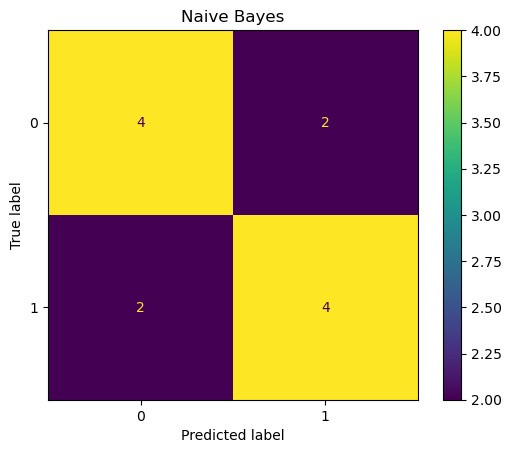

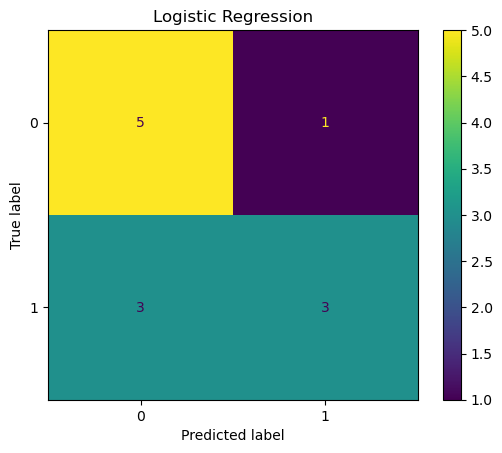

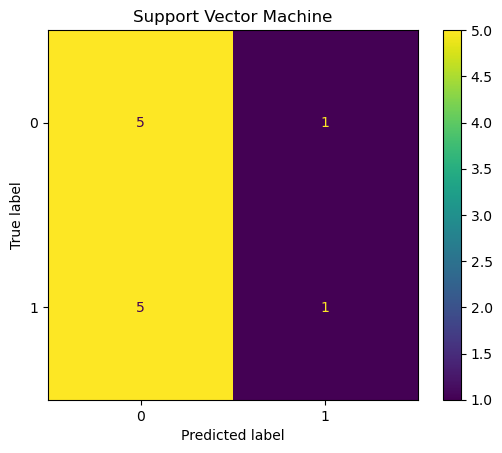

In [139]:
nb_conf_matrix = sklearn.metrics.confusion_matrix(y_test, nb_pred, labels=nb.classes_)
nb_d = metrics(y_test, nb_pred)

lr_conf_matrix = sklearn.metrics.confusion_matrix(y_test, lr_pred, labels=nb.classes_)
lr_d = metrics(y_test, lr_pred)

svm_conf_matrix = sklearn.metrics.confusion_matrix(y_test, svm_pred, labels=nb.classes_)
svm_d = metrics(y_test, svm_pred)


metrics_df = pd.DataFrame([nb_d, lr_d, svm_d], columns= ["Accuracy", "Precision", "Recall", "F1"], \
                           index= ["Naive Bayes", "Logistic Regression", "Support Vector Machine"])
display(metrics_df)


nb_disp = sklearn.metrics.ConfusionMatrixDisplay(nb_conf_matrix)
nb_disp.plot()
nb_disp.ax_.set_title("Naive Bayes")
#print(f"Naive Bayes: {metrics(y_test, nb_pred)}")

lr_disp = sklearn.metrics.ConfusionMatrixDisplay(lr_conf_matrix)
lr_disp.plot()
lr_disp.ax_.set_title("Logistic Regression")
#print(f"Logistic Regression: {metrics(y_test, lr_pred)}")

svm_disp = sklearn.metrics.ConfusionMatrixDisplay(svm_conf_matrix)
svm_disp.plot()
svm_disp.ax_.set_title("Support Vector Machine")
#print(f"Support Vector Machine: {metrics(y_test, svm_pred)}")

In [140]:


from joblib import dump, load
import os

try:
    os.mkdir('models')
except FileExistsError:
    pass

def saveModel(model, name, size):
    try:
        os.mkdir(rf'models\{vectype}_{size}')
    except FileExistsError:
        pass
    #cd = os.path.dirname(__file__)
    cd = rf"C:\Users\marce\Project\models\{vectype}_{size}"
    newPath = os.path.join(cd, rf'Model_{vectype}_{name}_{size}.pkl')
    dump(model, newPath)
    statsPath = os.path.join(cd, rf'Metrics_{vectype}_{size}.html')
    metrics_df.to_html(statsPath)
    logPath = os.path.join(cd, rf'TimeLog_{vectype}_{size}.txt')
    with open(logPath, 'w') as f:
        f.write(timeLog)


#for model in [(nb, 'NaiveBayes'), (lr, 'LogisticRegression'), (svm, 'SupportVectorMachine')]:
#    saveModel(model[0], model[1], size)

In [141]:
haha = None

print(haha)

def aaaa():
    global haha
    haha = 'heyyy'

aaaa()
print(haha)

None
heyyy
